# Mutational signatures analysis with mSigAct

In [5]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os

samples_dict = json.load(open('../../../cases_ids.json','rb'))

In [6]:
#change at the end
pt_to_case = {'case1':'pt2','case2':'pt3','case3':'pt1','case4':'pt8'}
root_out = "/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/"
# root_out = '../vcf_postprocessing/output/'

## Create input for mSigAct
A file containing all SNV mutations from all samples. There are 2 files cretaed:
- Clonal mutations.
- Subclonal mutations.

In [6]:
folder = './input/'
if not os.path.exists(folder):
    os.mkdir(folder)

### Clonals

In [7]:
df = pd.DataFrame()
for case in samples_dict.keys():
    pt = pt_to_case[case] # remove at the end
    root_out_pt = root_out + pt
    for tumor in ['tumor1','tumor2']:
        tumor_id = samples_dict[case][tumor]
        normal_id = samples_dict[case]['normal']
        df1 = pd.read_csv(root_out_pt+'/'+tumor_id+'_vs_'+normal_id+'/filter_and_annot/'+tumor_id+'_vs_'+normal_id+'_filt.maf.gz', sep='\t')
        
        df1 = df1[['#CHROM','POS','REF','ALT','SAMPLE']][(df1['mut_type']=='snv')&(df1['clonal']==True)]
        df = pd.concat([df,df1],ignore_index=True)
df = df.rename(columns={'#CHROM':'CHROM'})
df

,CHROM,POS,REF,ALT,SAMPLE
0,chr1,2124674,G,A,AQ5181_vs_AQ5175
1,chr1,10680552,C,G,AQ5181_vs_AQ5175
2,chr1,16443082,C,A,AQ5181_vs_AQ5175
3,chr1,24524785,G,T,AQ5181_vs_AQ5175
4,chr1,29334170,G,T,AQ5181_vs_AQ5175
...,...,...,...,...,...
8762,chrX,114639288,A,G,AW8051_vs_AW8061
8763,chrX,127052622,G,A,AW8051_vs_AW8061
8764,chrX,143856134,G,A,AW8051_vs_AW8061
8765,chrX,145440422,T,A,AW8051_vs_AW8061


In [5]:
df.groupby('ALT').count()  # check that there are no indels

,CHROM,POS,REF,SAMPLE
ALT,,,,
A,2934,2934,2934,2934
C,1502,1502,1502,1502
G,1413,1413,1413,1413
T,2918,2918,2918,2918


In [6]:
df.to_csv('./input/mutations_clonals.tsv.gz',sep='\t',index=None,compression='gzip')

### Subclonals

In [7]:
df = pd.DataFrame()
for case in samples_dict.keys():
    pt = pt_to_case[case] # remove at the end
    root_out_pt = root_out + pt
    for tumor in ['tumor1','tumor2']:
        tumor_id = samples_dict[case][tumor]
        normal_id = samples_dict[case]['normal']
        df1 = pd.read_csv(root_out_pt+'/'+tumor_id+'_vs_'+normal_id+'/filter_and_annot/'+tumor_id+'_vs_'+normal_id+'_filt.maf.gz', sep='\t')
        
        df1 = df1[['#CHROM','POS','REF','ALT','SAMPLE']][(df1['mut_type']=='snv')&(df1['clonal']==False)]
        df = pd.concat([df,df1],ignore_index=True)
df = df.rename(columns={'#CHROM':'CHROM'})
df

,CHROM,POS,REF,ALT,SAMPLE
0,chr1,3812176,T,C,AQ5181_vs_AQ5175
1,chr1,6993922,G,T,AQ5181_vs_AQ5175
2,chr1,14917188,G,T,AQ5181_vs_AQ5175
3,chr1,15453875,G,C,AQ5181_vs_AQ5175
4,chr1,20795865,G,C,AQ5181_vs_AQ5175
...,...,...,...,...,...
4010,chrX,108814008,G,A,AW8051_vs_AW8061
4011,chrX,118499583,C,T,AW8051_vs_AW8061
4012,chrX,119447007,G,A,AW8051_vs_AW8061
4013,chrX,144321775,C,T,AW8051_vs_AW8061


In [8]:
df.groupby('ALT').count()  # check that there are no indels

,CHROM,POS,REF,SAMPLE
ALT,,,,
A,1294,1294,1294,1294
C,733,733,733,733
G,667,667,667,667
T,1321,1321,1321,1321


In [9]:
df.to_csv('./input/mutations_subclonals.tsv.gz',sep='\t',index=None,compression='gzip')

## Execute mSigAct
Follow the instructions at the ```./mSigAct/``` folder.\
Once obtained the output, it can be read in the following code and the plots can be created.

## Functions to plot signature fitting analysis

In [9]:
#define a list with sample ids with CNAG barcode
df = pd.read_csv('./input/mutations_clonals.tsv.gz',sep='\t')
order_list = df['SAMPLE'].unique().tolist()

In [9]:
def color_sigs (sigs):

    colors_dict = {}
    colors_list = []
    greys = ['gainsboro','darkgrey','gray','lightgrey','lightgray','silver','dimgrey','dimgray','slategrey']
    i = 0
    for sig in sigs:
        if 'potential' in sig:
            color = greys[i]
            i+=1
        elif 'SBS1-' in sig or sig=='SBS1':
            color = 'orange'
        elif 'SBS2-' in sig or sig=='SBS2':
            color = 'olive'
        elif 'SBS3-' in sig or sig=='SBS3':
            color = 'mediumpurple'
        elif 'SBS5-' in sig or sig=='SBS5':
            color = 'skyblue'
        elif 'SBS7a' in sig:
            color = 'teal'
        elif 'SBS12' in sig:
            color = 'seagreen'
        elif 'SBS13' in sig:
            color = 'purple'
        elif 'SBS17b' in sig:
            color = 'pink'
        elif 'SBS18' in sig:
            color = 'royalblue'
        elif 'SBS31' in sig:
            color = 'firebrick'
        elif 'SBS32' in sig:
            color = 'plum'
        elif 'SBS35' in sig:
            color = 'lightcoral'
        elif 'SBS40' in sig:
            color = 'turquoise'
        elif 'SBS60' in sig:
            color = 'darkseagreen'
        else:
            color = greys[i]
            i+=1
            pass
        colors_dict[sig] = color
        colors_list.append(color)
    return colors_dict,colors_list

In [10]:
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

def plot_fitting_per_pt (df,title,ylim,legend,labels=['Subclonal','Clonal'],figsize=(3,2),text_pos=200,pos1=1,pos2=1,x_ticks_size=14):
    
    sigs = [sig for sig in df.columns.tolist() if sig != 'clonal']
    colors_dict,colors_list = color_sigs(sigs)
    df.plot(kind='bar', stacked=True, figsize=figsize,color=colors_list,legend=legend)
    
    if legend == True:
        plt.legend(title='Signatures', bbox_to_anchor=(pos1, pos2), loc='upper left')
        
    muts_subclonal = df1[sigs].sum(axis=1)[0]
    muts_clonal = df1[sigs].sum(axis=1)[1]

    plt.text(0,muts_subclonal+text_pos,str(int(round(muts_subclonal,0))),color='black', fontweight='normal',ha='center',va='center',size=15)
    plt.text(1,muts_clonal+text_pos,str(int(round(muts_clonal,0))),color='black', fontweight='normal',ha='center',va='center',size=15)

    plt.ylabel('Number of\nmutations',size=16)

    plt.axvline(0.5,linestyle='--',c='black')

    plt.xticks(range(0,len(df)), labels, rotation=0, size=x_ticks_size)
    plt.title(title,size=20,pad=20)
    plt.ylim(0,ylim)

    plt.xlabel(' ')

## Check mSigAct results

### mSigAct

In [7]:
#fix it at the end
# root_to_msigact_clonals = '/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/230220_allsamples_run20220809_clonals_SBS40/'
# root_to_msigact_subclonals = '/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/230220_allsamples_run20220809_subclonals_SBS40/'
root_to_msigact_clonals = './msigact/clonals/'
root_to_msigact_subclonals = './msigact/subclonals/'

# path_sbs31_clonals = root_to_msigact_clonals+'output_sbs31/results.all_samples_run_20220809_clonals.matrix.tsv.mSigAct.SBS31.tsv'
# path_sbs31_subclonals = root_to_msigact_subclonals+'output_sbs31/results.all_samples_run_20220809_subclonals.matrix.tsv.mSigAct.SBS31.tsv'
path_sbs31_clonals = root_to_msigact_clonals+'output_sbs31/results.clonals.matrix.tsv.mSigAct.SBS31.tsv'
path_sbs31_subclonals = root_to_msigact_subclonals+'output_sbs31/results.subclonals.matrix.tsv.mSigAct.SBS31.tsv'

# path_sbs35_clonals = root_to_msigact_clonals+'output_sbs35/results.all_samples_run_20220809_clonals.matrix.tsv.mSigAct.SBS35.tsv'
# path_sbs35_subclonals = root_to_msigact_subclonals+'output_sbs35/results.all_samples_run_20220809_subclonals.matrix.tsv.mSigAct.SBS35.tsv'
path_sbs35_clonals = root_to_msigact_clonals+'output_sbs35/results.clonals.matrix.tsv.mSigAct.SBS35.tsv'
path_sbs35_subclonals = root_to_msigact_subclonals+'output_sbs35/results.subclonals.matrix.tsv.mSigAct.SBS35.tsv'

### Prepare plots for paper figure

In [10]:
#Prepare lists with pvalues
clonals_df = pd.read_csv(path_sbs31_clonals,sep='\t')
clonals_df = clonals_df.reindex(order_list)
clonals_df = clonals_df[['SBS1','SBS5','SBS18','SBS40','SBS31']]
clonals_df['clonal'] = True

subclonals_df = pd.read_csv(path_sbs31_subclonals,sep='\t')
subclonals_df = subclonals_df.reindex(order_list)
subclonals_df = subclonals_df[['SBS1','SBS5','SBS18','SBS40','SBS31']]
subclonals_df['clonal'] = False

df31 = pd.concat([subclonals_df,clonals_df],ignore_index=False)

In [15]:
#Prepare lists with pvalues
clonals_df = pd.read_csv(path_sbs35_clonals,sep='\t')
clonals_df = clonals_df.reindex(order_list)
clonals_df = clonals_df[['SBS1','SBS5','SBS18','SBS40','SBS35']]
clonals_df['clonal'] = True

subclonals_df = pd.read_csv(path_sbs35_subclonals,sep='\t')
subclonals_df = subclonals_df.reindex(order_list)
subclonals_df = subclonals_df[['SBS1','SBS5','SBS18','SBS40','SBS35']]
subclonals_df['clonal'] = False

df35 = pd.concat([subclonals_df,clonals_df],ignore_index=False)

## Plots separating clonal vs. subclonal, including all signatures (stacked)

### Case 1

#### ARMS, SBS31

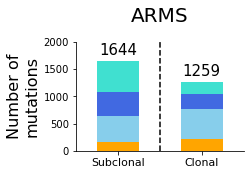

In [16]:
df = df31.copy()
case = 'case1'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']
df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id])]

title = 'ARMS'
ylim = 2000
legend = False
x_ticks_size = 11

plot_fitting_per_pt(df1,title,ylim,legend,x_ticks_size=x_ticks_size)

plt.savefig('./figures_paper/case1_arms_sbs31_all_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

#### ARMS, SBS35

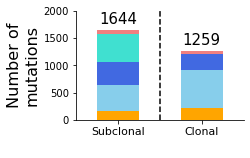

In [17]:
df = df35.copy()
case = 'case1'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']
df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id])]

title = ''
ylim = 2000
legend = False
x_ticks_size = 11

plot_fitting_per_pt(df1,title,ylim,legend,x_ticks_size=x_ticks_size)

plt.savefig('./figures_paper/case1_arms_sbs35_all_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

#### tAML, SBS31

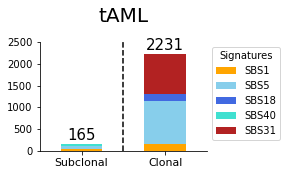

In [18]:
df = df31.copy()
case = 'case1'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']
df1 = df[df.index.isin([tumor2_id+'_vs_'+normal_id])]

title = 'tAML'
ylim = 2500
legend=True
x_ticks_size = 11

plot_fitting_per_pt(df1,title,ylim,legend,x_ticks_size=x_ticks_size)

plt.ylabel('')

plt.savefig('./figures_paper/case1_taml_sbs31_all_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

#### tAML, SBS35

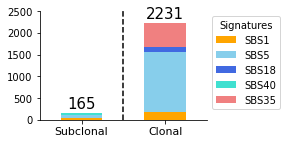

In [19]:
df = df35.copy()
case = 'case1'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']
df1 = df[df.index.isin([tumor2_id+'_vs_'+normal_id])]

title = ''
ylim = 2500
legend = True
x_ticks_size = 11

plot_fitting_per_pt(df1,title,ylim,legend,x_ticks_size=x_ticks_size)

plt.ylabel('')

plt.savefig('./figures_paper/case1_taml_sbs35_all_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

### Case 2

#### EPN, SBS31

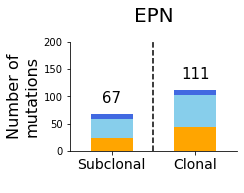

In [20]:
df = df31.copy()
case = 'case2'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']
df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id])]

title = 'EPN'
ylim = 200
legend = False
text_pos = 30

plot_fitting_per_pt(df1,title,ylim,legend,text_pos=text_pos)

plt.savefig('./figures_paper/case2_epn_sbs31_all_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

#### EPN, SBS35

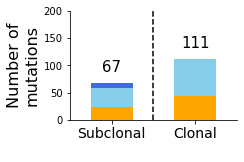

In [21]:
df = df35.copy()
case = 'case2'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']
df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id])]

title = ''
ylim = 200
legend = False
text_pos = 30

plot_fitting_per_pt(df1,title,ylim,legend,text_pos=text_pos)

plt.savefig('./figures_paper/case2_epn_sbs35_all_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

#### DMG, SBS31

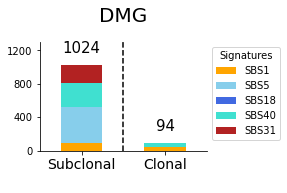

In [22]:
df = df31.copy()
case = 'case2'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']
df1 = df[df.index.isin([tumor2_id+'_vs_'+normal_id])]

title = 'DMG'
ylim = 1300
legend=True

plot_fitting_per_pt(df1,title,ylim,legend)

plt.yticks(np.arange(0,1400,400))
plt.ylabel('')

plt.savefig('./figures_paper/case2_dmg_sbs31_all_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

#### DMG, SBS35

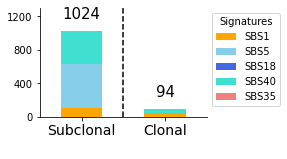

In [23]:
df = df35.copy()
case = 'case2'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']
df1 = df[df.index.isin([tumor2_id+'_vs_'+normal_id])]

title = ''
ylim = 1300
legend = True

plot_fitting_per_pt(df1,title,ylim,legend)

plt.yticks(np.arange(0,1400,400))
plt.ylabel('')

plt.savefig('./figures_paper/case2_dmg_sbs35_all_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

### Case 3

#### NB, SBS31

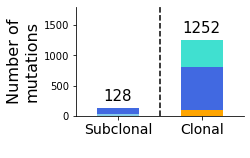

In [24]:
df = df31.copy()
case = 'case3'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']
df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id])]

title=''
ylim = 1800
legend=False

plot_fitting_per_pt(df1,title,ylim,legend)

plt.savefig('./figures_paper/case3_nb_sbs31_all_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

#### NB, SBS35

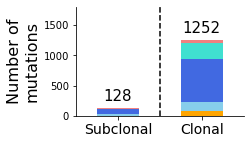

In [25]:
df = df35.copy()
case = 'case3'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']
df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id])]

title=''
ylim = 1800
legend=False

plot_fitting_per_pt(df1,title,ylim,legend)

plt.savefig('./figures_paper/case3_nb_sbs35_all_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

#### MRT, SBS31

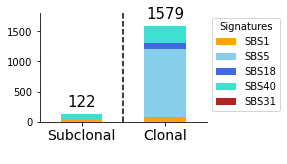

In [26]:
df = df31.copy()
case = 'case3'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']
df1 = df[df.index.isin([tumor2_id+'_vs_'+normal_id])]

title = ''
ylim = 1800
legend = True

plot_fitting_per_pt(df1,title,ylim,legend)

plt.ylabel('')

plt.savefig('./figures_paper/case3_mrt_sbs31_all_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

#### MRT, SBS35

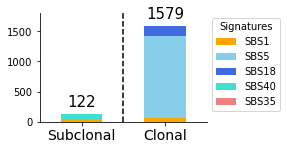

In [27]:
df = df35.copy()
case = 'case3'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']
df1 = df[df.index.isin([tumor2_id+'_vs_'+normal_id])]

title = ''
ylim = 1800
legend = True

plot_fitting_per_pt(df1,title,ylim,legend)

plt.ylabel('')

plt.savefig('./figures_paper/case3_mrt_sbs35_all_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

## Plots with 2 bars, separating platinum vs. aging signatures

In [11]:
def plot_2_bars (sample_id,title,ylim,y_val):
    
    sigs = [sig for sig in df.columns.tolist() if sig != 'clonal']
    df1 = df[df.index.isin([sample_id])]

    other_sigs = ['SBS1','SBS5','SBS18','SBS40']

    df1['other_sigs'] = df1[other_sigs].sum(axis=1)
    df1 = df1[['SBS31','other_sigs','clonal']]

    colors_dict,colors_list = color_sigs(sigs)

    figsize = (3,2)
    legend=False
    pos1=1
    pos2=1

    pos1=0.05
    pos2=-0.2

    fig, ax = plt.subplots(figsize=figsize)

    for x,val in enumerate(df1['SBS31'].tolist()):
        pos = x-0.2
        ax.bar(pos, val,color='firebrick',width=0.2)


    for x,val in enumerate(df1['other_sigs'].tolist()):
        pos = x +0.2
        ax.bar(pos, val,color='grey',width=0.2)


    if legend == True:
        plt.legend(title='Signatures', bbox_to_anchor=(pos1, pos2), loc='upper left')
        
    labels = ['Subclonals','Clonals']
    plt.xticks(range(0,len(df1)), labels, rotation=0,size=14)
    plt.title(title,size=20,pad=20)
    plt.ylim(0,ylim)

    plt.xlabel(' ')
    plt.ylabel('Number of\nmutations',size=16)

    mpl.rcParams['axes.spines.right'] = False
    mpl.rcParams['axes.spines.top'] = False

    plt.axvline(0.5,linestyle='--',c='black')
    
    for i, v in enumerate(df1['SBS31']):
        plt.text(i-0.2, v+y_val, str(int(round(v,0))), color='firebrick', fontweight='normal',ha='center',va='center',size=15)
    for i, v in enumerate(df1['other_sigs']):
        plt.text(i+0.2, v+y_val, str(int(round(v,0))), color='grey', fontweight='normal',ha='center',va='center',size=15)



### Plot legend

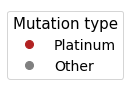

In [29]:
import matplotlib.lines as mlines
fig, ax = plt.subplots(figsize=(1,1))
plt.xticks([])
plt.yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

sbs31 = mlines.Line2D([], [], color='firebrick', marker='o', linestyle='None',
                          markersize=8, label='Platinum')
other_signatures = mlines.Line2D([], [], color='grey', marker='o', linestyle='None',
                          markersize=8, label='Other')

plt.legend(handles=[sbs31,other_signatures],bbox_to_anchor=(1,0.05,1,1),fontsize=14,title='Mutation type',title_fontsize=15)
plt.savefig('./figures_paper/legend_platinum_vs_other.png',dpi=300, format='png',transparent=True,bbox_inches='tight')


## Case 1

### ARMS, SBS31

/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


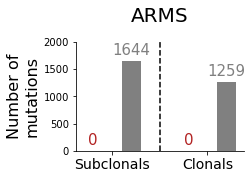

In [30]:
df = df31.copy()
case = 'case1'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']

sample_id = tumor1_id + '_vs_'+normal_id

ylim = 2000
title='ARMS'
y_val = 200
plot_2_bars (sample_id,title,ylim,y_val)
plt.savefig('./figures_paper/case1_arms_sbs31_vs_others.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

### tAML, SBS31

/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


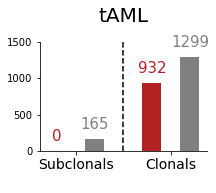

In [31]:
df = df31.copy()
case = 'case1'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']

sample_id = tumor2_id + '_vs_'+normal_id

ylim = 1500
title='tAML'
y_val = 200
plot_2_bars (sample_id,title,ylim,y_val)
plt.ylabel('')
plt.savefig('./figures_paper/case1_taml_sbs31_vs_others.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

## Case 2

### EPN, SBS31

/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


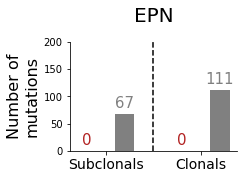

In [32]:
df = df31.copy()
case = 'case2'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']

sample_id = tumor1_id + '_vs_'+normal_id

ylim = 200
title='EPN'
y_val = 20
plot_2_bars (sample_id,title,ylim,y_val)
plt.savefig('./figures_paper/case2_epn_sbs31_vs_others.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

### DMG, SBS31

/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


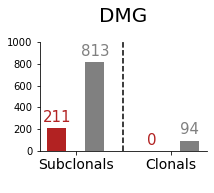

In [33]:
df = df31.copy()
case = 'case2'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']

sample_id = tumor2_id + '_vs_'+normal_id

ylim = 1000
title='DMG'
y_val = 100
plot_2_bars (sample_id,title,ylim,y_val)
plt.ylabel('')
plt.savefig('./figures_paper/case2_dmg_sbs31_vs_others.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

## Case 3

### NB, SBS31

/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


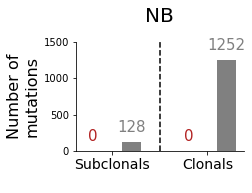

In [34]:
df = df31.copy()
case = 'case3'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']

sample_id = tumor1_id + '_vs_'+normal_id

ylim = 1500
title = 'NB'
y_val = 200
plot_2_bars (sample_id,title,ylim,y_val)
plt.savefig('./figures_paper/case3_nb_sbs31_vs_others.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

### MRT, SBS31

/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


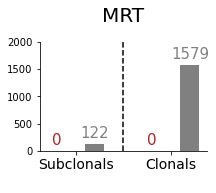

In [35]:
df = df31.copy()
case = 'case3'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']

sample_id = tumor2_id + '_vs_'+normal_id

ylim = 2000
title='MRT'
y_val=200
plot_2_bars (sample_id,title,ylim,y_val)
plt.ylabel('')
plt.savefig('./figures_paper/case_mrt_sbs31_vs_others.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()